# Fake News Detection
**Autor: Albert Heckmann**

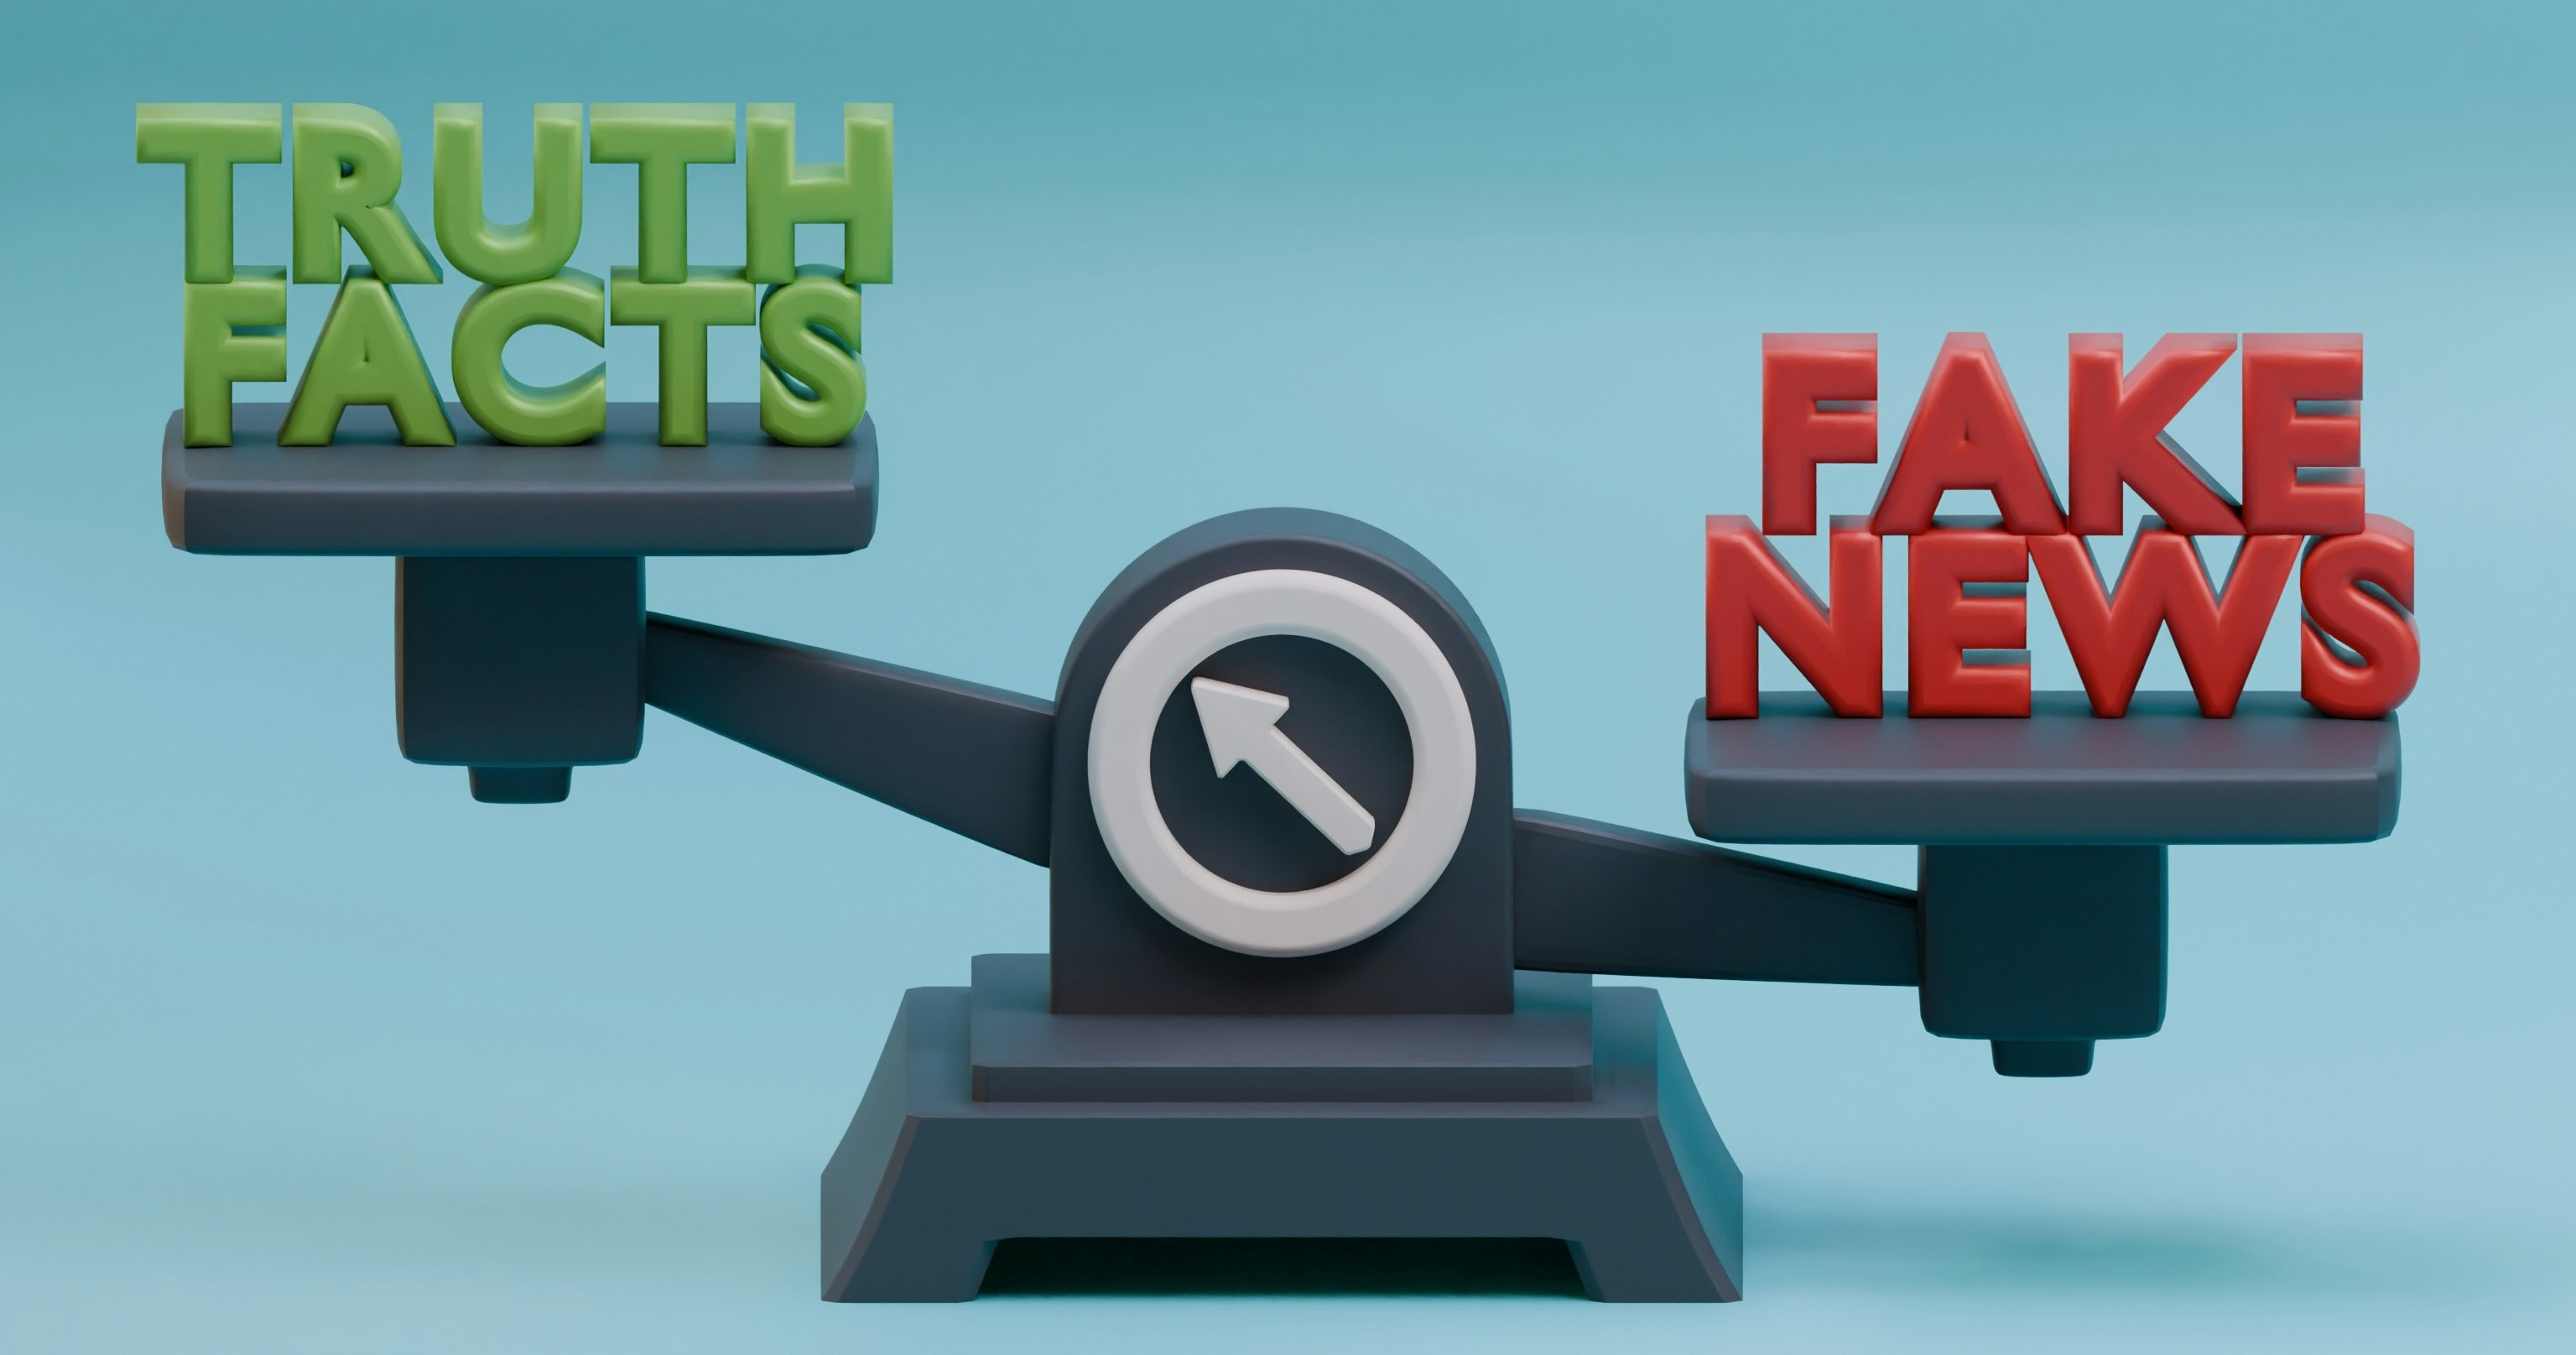
*Foto von Hartono Creative Studio auf Unsplash*: [link](https://unsplash.com/de/fotos/eine-waage-mit-der-aufschrift-fake-news-v9xYKxe5wok)

## Inhaltsverzeichnis 
### Durchführung
- [Einlesen und Vorverarbeitung der Daten](#Einlesen-und-Vorverarbeitung-der-Daten)
- [Explorative Datenanalyse](#Explorative-Datenanalyse)
- [Modellierung](#Modellierung)
- [Ergebnisse der Modelle](#Ergebnisse-der-Modelle)

## Einführung
### Was sind Fake News?
Fake News sind mit Absicht verbreitet Falschinformationen, die sich als echte ausgeben um manipulative Zwecke zu erfüllen.\
Gezielte Themen wären z.B. Politik, Verunsicherung, Aufmerksamkeit im Werbebereich, Diskreditierung von Personen oder Gruppen etc.

Dies kann gravierende Folgen auf verschiedenen Ebenen haben.
- Verzerrte Meinungsbildung durch Entscheidungen auf Grundlage falscher Informationen.
- Spaltung der Gesellschaft.
- Beeinflussung von Wahlen.
- Verunsicherung & Misstrauen.
- Wirtschaftlicher Schaden.

### Wie kann man diese erkennen?
- Zum einen durch das eigene Prüfen der Quellen: Wer hat was verbreitet?
- Fakten checken, ob es verlässliche Quellen gibt, die das verifizieren können.
- Bilder & Videos überprüfen, ob diese aus dem Kontext gerissen wurden.
- Sprachen analysieren, ob diese überspitzt oder unnatürlich wirken.

## Aufgabenstellung
Es wurden 2 Datensätze (***Fake.csv***, ***True.csv***) bereitgestellt, die auf realen Daten basieren. ([Quelle: Kaggle.com](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets/data)) \
Die wahrheitsgemäßen Artikel wurden durch Crawlen von Artikeln von Reuters.com gewonnen.\
Die Fakenews-Artikel stammen von unseriösen Webseiten, die von "Politifact" (einer Faktencheck-Organisation in den USA) und Wikipedia gemeldet wurden.\

Ziel ist es hierbei, ein Modell zu entwickeln, welches relativ genau unterscheiden kann, ob es sich bei einem Artikel um Fake News handelt oder nicht. 

**Aufbau der Datensätze:**\
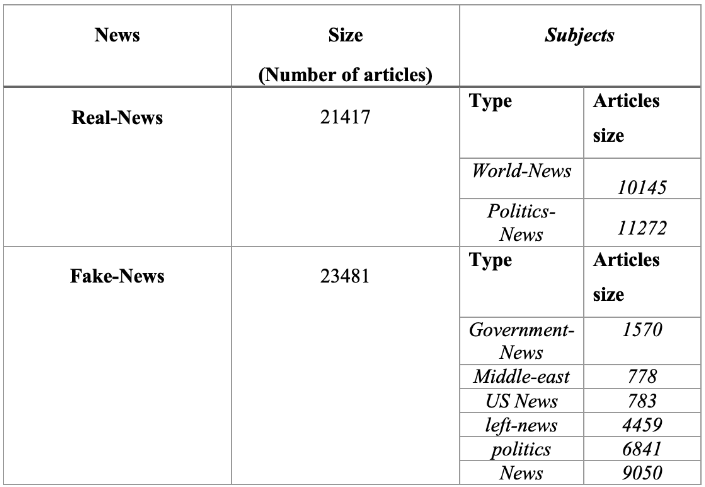

## Durchführung

### Einlesen und Vorverarbeitung der Daten

In [56]:
# Importieren der Bibliotheken.
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
# Einlesen der beiden Datensätze.
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [58]:
# Prüfen auf NA-Values im Datensatz.
print(df_fake.isnull().sum())
print(df_true.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


Idee: Die Types im Datensatz ***fake*** zusammenzuführen, damit nur noch 2 Types wie in Datensatz ***true*** übrig bleiben.

Damit es im Datensatz ***fake*** relativ ausgeglichen ist, werden die Types entsprechend eingeordnet.

In [59]:
df_fake["subject"] = df_fake["subject"].replace({
    'Government News': 'politicsNews', 
    'Middle-east': 'worldnews', 
    'US_News': 'worldnews', 
    'left-news': 'politicsNews',
    'politics': 'politicsNews',
    'News': 'worldnews',
})

In [60]:
df_fake["subject"].value_counts()

subject
politicsNews    12870
worldnews       10611
Name: count, dtype: int64

Der nächster Schritt wäre ein Target (**fake_news**) in den jeweiligen Datensätze einzufügen, um erkenntlich zu machen, ob es sich um Fake News handelt oder nicht.

In [61]:
df_true["fake_news"] = 0
df_fake["fake_news"] = 1

Zusammenführen der beiden Datensatz zu einem.

In [62]:
# Entlang der Zeilen zusammenführen.
df_merge = pd.concat([df_true,df_fake], axis = 0) 

In [63]:
# Zufälliges mischen der Zeilen bei einem definiertem randomstate für die Reproduzierbarkeit.
df_news = df_merge.sample(frac=1, random_state=42).reset_index(drop=True) 


In [64]:
df_news

,title,text,subject,date,fake_news
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",worldnews,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,worldnews,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,worldnews,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politicsNews,"Apr 25, 2017",1
...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",0
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,worldnews,"June 29, 2016",1
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,politicsNews,"Feb 27, 2016",1
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",0


Die Spalte **"date"** scheint falsche Einträge (Tippfehler, Leerzeichen am ende etc.) zu haben, was die Formatierung erschwert.


In [65]:
df_news["date"]

0             July 21, 2017
1               May 7, 2016
2          December 3, 2016
3          October 6, 2017 
4              Apr 25, 2017
                ...        
44893    December 27, 2017 
44894         June 29, 2016
44895          Feb 27, 2016
44896     November 2, 2017 
44897     November 1, 2017 
Name: date, Length: 44898, dtype: object

In [66]:
# Entfernt Leerzeichen am Ende eines Eintrags.
df_news["date"] = df_news["date"].str.rstrip()

In [67]:
# Einfügen der dateime Bibliothek.
from datetime import datetime
df_news["date"] = pd.to_datetime(df_news["date"], format='mixed', errors='coerce')


Dennoch sind bei der Formatierung einige falsche Werte erhalten geblieben.\
Diese können nun gelöscht werden.

In [68]:
df_news.isnull().sum()

title         0
text          0
subject       0
date         10
fake_news     0
dtype: int64

In [69]:
df_news = df_news.dropna()

In [70]:
# Zeitindex als Index benutzen und reseten.
df_news.set_index('date', inplace=True)
df_news = df_news.sort_index()

### Explorative Datenanalyse

In [71]:
df_news

,title,text,subject,fake_news
date,,,,
2015-03-31,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politicsNews,1
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politicsNews,1
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politicsNews,1
2015-03-31,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politicsNews,1
2015-03-31,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politicsNews,1
...,...,...,...,...
2018-02-18,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politicsNews,1
2018-02-18,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politicsNews,1
2018-02-19,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politicsNews,1


#### Thema & Falschnachrichten im Verhältnis der Nachrichtenanzahl über die Zeit

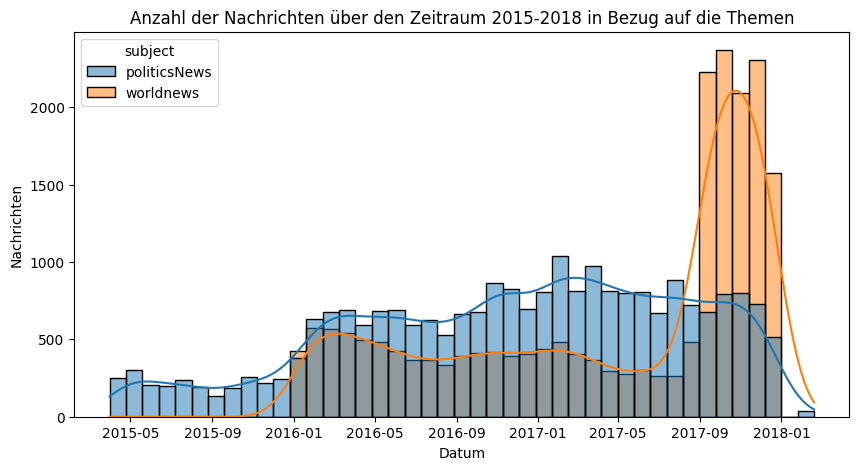

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(ax=ax, data = df_news, x = df_news.index, hue="subject", kde=True);
ax.set_title("Anzahl der Nachrichten über den Zeitraum 2015-2018 in Bezug auf die Themen");
ax.set(xlabel = "Datum", ylabel = "Nachrichten");
plt.show();

Berücksichtigt man, dass die ursprünglichen Themen jeweils in *World-News* und *Politics-News* unterteilt wurden, lässt sich ein Trend erkennen.\
Die Weltnachrichten nehmen von September 2017 bis Januar 2018 deutlich zu.

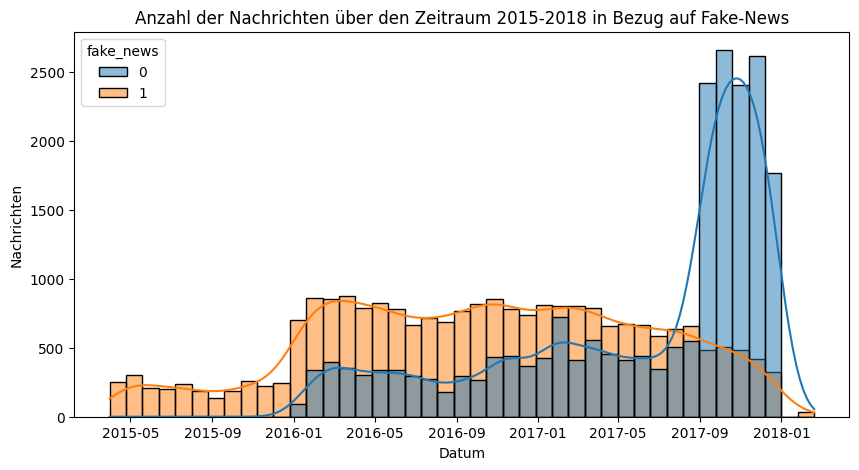

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(ax=ax, data = df_news, x = df_news.index, hue="fake_news", kde=True);
ax.set_title("Anzahl der Nachrichten über den Zeitraum 2015-2018 in Bezug auf Fake-News");
ax.set(xlabel = "Datum", ylabel = "Nachrichten");
plt.show();

Betrachtet man die Gesamtverteilung von echten und gefälschten Nachrichten, so haben beide ein nahezu gleiches Gewicht.

In [74]:
df_news["fake_news"].value_counts()

fake_news
1    23471
0    21417
Name: count, dtype: int64

In [75]:
# Betrachtung der Nachrichten im Zeitraum September 2017 bis 2018 in Bezug auf Fake-News
df_17_18 = df_news.sort_index().loc['2017-09-01':'2018-02-19', :]
df_17_18["fake_news"].value_counts()

fake_news
0    11875
1     2246
Name: count, dtype: int64

Obwohl die Anzahl der Meldungen zwischen **September 2017** und **2018** stark angestiegen ist, beträgt der Anteil der Fake News nur **18,91 %**.

In [76]:
# Betrachtung der Nachrichten im Zeitraum 2016 bis September 2017 in Bezug auf Fake-News
df_16_17 = df_news.sort_index().loc['2016-01-01':'2017-09-01', :]
df_16_17["fake_news"].value_counts()

fake_news
1    18764
0     9605
Name: count, dtype: int64

Der Anteil der Fake News im Zeitraum von **2016 bis September 2017** lag hier deutlich höher mit **51,18%**.

In [77]:
# Betrachtung der Nachrichten im Zeitraum 2016 bis September 2017 in Bezug auf Fake-News
df_15_16 = df_news.sort_index().loc['2015-03-31':'2016-01-01', :]
df_15_16["fake_news"].value_counts()

fake_news
1    2512
Name: count, dtype: int64

Im Zeitraum **März 2015 bis 2016** waren sogar ausschließlich Fake News vertreten. 

#### Zusammenfassung der Diagramme

Die Betrachtung der Zeiträume zeigt, dass die Fake News im Jahr 2016 ihren Höhepunkt hatten und im Laufe der Zeit stetig abgenommen haben.
Im Gegensatz dazu haben die echten Nachrichten ab 2016 bis September 2017 zugenommen und sind danach extrem angestiegen.\

Einige mögliche Ursachen könnte sein:
- Februar 2016 war der Startschuss für die US-Vorwahlen (Primaries & Caucuses) zur Präsidentschaftswahl im November 2016.
  ([link->bpb](https://www.bpb.de/kurz-knapp/hintergrund-aktuell/219729/vorwahlen-in-den-usa/))
- Die US-Wahl in Amerika.In den ersten Monaten von Trumps Präsidentschaft ab 2017 gab es viele Fake News.
- Auftauchen und Professionalisierung von Fake News-Seiten als Experimentierphase.
  ([link->wikipedia](https://en.wikipedia.org/wiki/Liberty_Writers_News?utm_source=chatgpt.com))
  
Die Abnahme von Fake News über den Zeitraum Ende 2017 könnte daran liegen, dass es Ermittlungen zu Desinformation gab (z. B. in Russland) oder das Onlineplattformen wie Facebook eine Änderung des Newsfeed-Algorithmus angekündigt haben. ([link->theguardian](https://www.theguardian.com/technology/2018/jan/11/facebook-news-feed-algorithm-overhaul-mark-zuckerberg?utm_source=chatgpt.com))

Auch scheint es einen Zusammenhang zu geben zwischen den echten Nachrichten und den Weltnachrichten ab September 2017.\
Denn Weltnachrichten befassen sich in der Regel mit globalen Ereignissen wie Naturkatastrophen, internationalen Konflikten etc. und könnten somit weniger anfällig für Fake News sein.\
Bei internationalen Ereignissen arbeiten Nachrichtenorganisationen oft zusammen und nutzen gemeinsame Faktenprüfungsnetzwerke, was die Genauigkeit der Berichterstattung erhöht.


### Modellierung

Auswahl einiger Modelle bezüglich der Genauigkeit.

In [78]:
df_news_ml = df_news.drop(["subject"], axis=1) # Das Merkmal "subject" für diese Modellierung nicht relevant.
df_news_ml

,title,text,fake_news
date,,,
2015-03-31,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,1
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,1
2015-03-31,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,1
2015-03-31,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",1
2015-03-31,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,1
...,...,...,...
2018-02-18,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,1
2018-02-18,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,1
2018-02-19,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",1


#### MultinomialNB + CountVectorizer

In [122]:
# Erstellen von X(Merkmale) und y(Zielvariable).
# Da der CountVectorizer nur mit einer Textspalte zurecht kommt, ist hier die Idee die 2 Spalten (title und text) zu kombinieren. 
df_news_ml["combined_text"] = df_news_ml["title"] + " " + df_news_ml["text"]
X = df_news_ml["combined_text"]
y = df_news_ml["fake_news"]

In [129]:
# Erstellung der Train-und Testdaten.
# Einsatz der CountVectorizer Methode zur Umwandlung von Textdaten in numerische Merkmale.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

start_time = time.time() # Startzeitpunkt festlegen.

cv = CountVectorizer(ngram_range=(1,2)) # Anzahl der Biagrams auf 2 erhöht.
cv.fit(X_train)

X_train_transformed = cv.transform(X_train)
X_test_transformed = cv.transform(X_test)

# Einsatz der Multinomial Naive Bayes Methode zur Textklassifikation.
from sklearn.naive_bayes import MultinomialNB

nb_count = MultinomialNB()
nb_count.fit(X_train_transformed, y_train)

print("Genauigkeit: {:.5f}".format(nb_count.score(X_test_transformed, y_test)))

# Der Train-Datensatz hat nun über 33k Zeilen und über 100k Spalten.
print(X_train_transformed.shape)

print("--- %s seconds ---" % round(((time.time() - start_time)),3))# Aktuelle Zeit - Start

Genauigkeit: 0.97612
(33666, 2553471)
--- 35.08 seconds ---


Mit **97,61 %** Genauigkeit bezogen auf die Testdaten ist das ein schon recht guter Wert.\
Wenn man bedenkt, dass das Modell mit einem mit über 30k Zeilen und über 100k Merkmalen trainiert worden ist. 

#### MultinomialNB + TfidfVectorizer

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

start_time = time.time()

tf = TfidfVectorizer(ngram_range=(1,2))
tf.fit(X_train)

X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

nb_tf = MultinomialNB()
nb_tf.fit(X_train_tf, y_train)

print("Genauigkeit: {:.5f}".format(nb_tf.score(X_test_tf, y_test)))
print("--- %s seconds ---" % round(((time.time() - start_time)),3))

Genauigkeit: 0.96222
--- 35.397 seconds ---


Mit **96,22 %** Genauigkeit ist die Kombination durch TfidfVectorizer ebenfalls sehr gut aber nur minimal schlechter als mit dem CountVectorizer.

#### TfidfVectorizer + Logistische Regression

Eine weitere Möglichkeit wäre den TfidfVectorizer mit der logitischen Regression.

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline # Erstellen einer Pipeline für geordnete Verarbeitung.
from sklearn.model_selection import cross_val_score # Kreuzvaliederung für bessere gemittelte Genauigkeit.

start_time = time.time()

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),
        stop_words='english',
        max_features=50000,
        sublinear_tf=True
    )),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("Cross valitation score: {:.5f}".format(cv_scores.mean()))
print("--- %s seconds ---" % round(((time.time() - start_time)),3))

Cross valitation score: 0.99177
--- 78.673 seconds ---


Die gemittelte Genauigkeit beträgt bei dieser Kombination **99.17 %** was sehr bemerkenswert ist.\
Nachteil hierbei ist die ca. doppelte Berechnungsdauer.\
Aber je nach Aufgabenstellung könnte man argumentieren, ob man die längere Rechnenzeit in Kauf nimmt um eine hervorragende Genauigkeit zu erzielen.

#### TfidfVectorizer + LightGBM 

In [119]:
import lightgbm as lgb

start_time = time.time()

tf = TfidfVectorizer(ngram_range=(1,2))
tf.fit(X_train)

X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

lgb = lgb.LGBMClassifier(
    objective='binary',
    max_depth=10,
    n_jobs=-1  # alle CPUs nutzen
)

lgb.fit(X_train_tf, y_train)
print("Genauigkeit: {:.5f}".format(lgb.score(X_test_tf, y_test)))
print("--- %s seconds ---" % round(((time.time() - start_time)),3))

[LightGBM] [Info] Number of positive: 17513, number of negative: 16153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.281506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3176144
[LightGBM] [Info] Number of data points in the train set: 33666, number of used features: 94704
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520198 -> initscore=0.080838
[LightGBM] [Info] Start training from score 0.080838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lgb.predict(X_test_tf)
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99867   0.99848   0.99858      5264
           1    0.99866   0.99883   0.99874      5958

    accuracy                        0.99866     11222
   macro avg    0.99866   0.99865   0.99866     11222
weighted avg    0.99866   0.99866   0.99866     11222



Der LightGBM zusammen mit TfidfVectorizer liefert hier eine Genauigkeit von **99,86 %**.\
Das Modell braucht etwas länger als die logistische Regression ist aber in Bezug auf Genauigkeit noch ein Stück besser.\
Über den classification_report lässt sich sehen wie gut das Modell abschneidet.\
Bei Precision wurden die Vorhersagen zu **99,86 %** korrekt erkannt.\
Beim Recall wurden die echten y-Werte zu **99,8 %** korrekt ermittelt.\
Der f1 (Precision und Recall Verhältnis) lag bei einem ähnlichen Wert.

### Ergebnisse der Modelle

In [216]:
# Erstellung eines Dataframes mit den Resultaten
model_scores = {
    "Modell":["LightGBM+TfidfVectorizer","LogisticRegression+TfidfVectorizer","MultinomialNB+TfidfVectorizer","MultinomialNB+CountVectorizer"],
    "Score":[lgb.score(X_test_tf, y_test), cv_scores.mean(), nb_count.score(X_test_transformed, y_test), nb_tf.score(X_test_tf, y_test)]  
}
df_results = pd.DataFrame(data = model_scores)

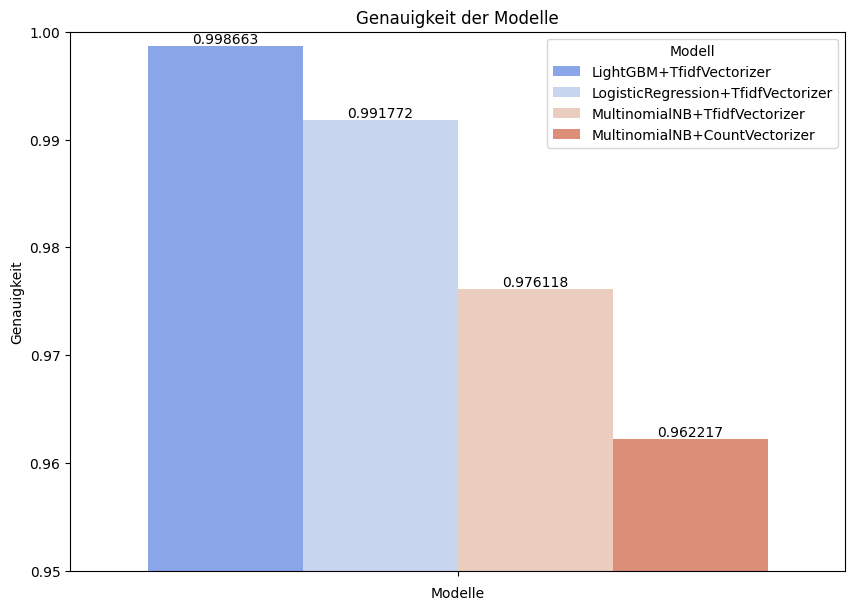

In [239]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(ax=ax, data = df_results, y="Score", hue="Modell", palette='coolwarm');
ax.set_title("Genauigkeit der Modelle");
ax.set(xlabel = "Modelle", ylabel = "Genauigkeit");
ax.bar_label(ax.containers[0]); # Anzeigen der Genauigkeit fürs entsprechende Modell.
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
ax.bar_label(ax.containers[3]);
ax.set_ylim(0.95, 1) # Begrenzung der Y-Achse für bessere Darstellung.
plt.show();

Genauigkeit der Modelle (absteigend):
* LightGBM + TfidfVectorizer ->                **99,86 %**
* Logistische Regression + TfidfVectorizer ->  **99,17 %**
* MultinomialNB + CountVectorizer ->           **97,61 %**
* MultinomialNB + TfidfVectorizer ->           **96,22 %**